# **Processing in Kaggle for Dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/favorita-grocery-sales-forecasting/test.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/stores.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/items.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/holidays_events.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/transactions.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/train.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/oil.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/sample_submission.csv.7z


In [2]:
!7z e /kaggle/input/favorita-grocery-sales-forecasting/holidays_events.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/favorita-grocery-sales-forecasting                                                          1 file, 1898 bytes (2 KiB)

Extracting archive: /kaggle/input/favorita-grocery-sales-forecasting/holidays_events.csv.7z
--
Path = /kaggle/input/favorita-grocery-sales-forecasting/holidays_events.csv.7z
Type = 7z
Physical Size = 1898
Headers Size = 146
Method = LZMA2:24k
Solid = -
Blocks = 1

    Everything is Ok

Size:       22309
Compressed: 1898


In [3]:
!7z e /kaggle/input/favorita-grocery-sales-forecasting/items.csv.7z
!7z e /kaggle/input/favorita-grocery-sales-forecasting/oil.csv.7z
!7z e /kaggle/input/favorita-grocery-sales-forecasting/stores.csv.7z
!7z e /kaggle/input/favorita-grocery-sales-forecasting/train.csv.7z
!7z e /kaggle/input/favorita-grocery-sales-forecasting/transactions.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/favorita-grocery-sales-forecasting                                                          1 file, 14315 bytes (14 KiB)

Extracting archive: /kaggle/input/favorita-grocery-sales-forecasting/items.csv.7z
--
Path = /kaggle/input/favorita-grocery-sales-forecasting/items.csv.7z
Type = 7z
Physical Size = 14315
Headers Size = 122
Method = LZMA2:17
Solid = -
Blocks = 1

    Everything is Ok

Size:       101841
Compressed: 14315

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/favorita-grocery-sales-forecasting                                      

In [4]:
!7z e /kaggle/input/favorita-grocery-sales-forecasting/test.csv.7z



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/favorita-grocery-sales-forecasting                                                          1 file, 4885065 bytes (4771 KiB)

Extracting archive: /kaggle/input/favorita-grocery-sales-forecasting/test.csv.7z
--
Path = /kaggle/input/favorita-grocery-sales-forecasting/test.csv.7z
Type = 7z
Physical Size = 4885065
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      9% - test.cs               23% - test.cs               36% - test.cs               49% - test.cs               66% - test.cs               79% - test.cs               96% - test.cs              Everything is Ok

Size:       126163026
Compressed: 4885065


# **Importing all libraries**

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,minmax_scale,PolynomialFeatures,StandardScaler,Normalizer
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import train_test_split
%matplotlib inline
import datetime
from datetime import date, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import keras
import sys
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import lightgbm as lgb

# **Data Loading**

In [6]:
#Loading the data
dtypes = {'store_nbr': np.dtype('int64'),
          'item_nbr': np.dtype('int64'),
          'unit_sales': np.dtype('float64'),
          'onpromotion': np.dtype('O')}


test = pd.read_csv('/kaggle/working/test.csv', dtype=dtypes)
stores = pd.read_csv('/kaggle/working/stores.csv')
items = pd.read_csv('/kaggle/working/items.csv')
trans = pd.read_csv('/kaggle/working/transactions.csv')
#oil = pd.read_csv('../input/oil.csv') #we upload this database later
holidays = pd.read_csv('/kaggle/working/holidays_events.csv')

In [7]:
Sales = pd.read_csv('/kaggle/working/train.csv',
    
    skiprows=range(1, 66458909)  # 2016-01-01
)

In [8]:
#sampling the data, since the data is too huge to carry put any operations
#date_mask = (Sales['date'] >= '2017-07-15') & (Sales['date'] <= '2017-08-01')
date_mask = (Sales['date'] >= '2017-07-15') & (Sales['date'] <= '2017-08-15')

Salesdf = Sales[date_mask]

#Print the size
len(Salesdf)


3359566

In [9]:
Salesdf.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
55678566,122137474,2017-07-15,1,99197,2.0,False
55678567,122137475,2017-07-15,1,103520,1.0,False
55678568,122137476,2017-07-15,1,105574,6.0,False
55678569,122137477,2017-07-15,1,105575,10.0,False
55678570,122137478,2017-07-15,1,105737,3.0,False


# **Corroborating the date**

In [10]:
#Load the data
oil = pd.read_csv('oil.csv')

#add missing date
min_oil_date = min(Salesdf.date)
max_oil_date = max(Salesdf.date)

min_oil_date = str(min_oil_date)[0:10]
max_oil_date = str(max_oil_date)[0:10]
calendar = []



In [11]:
d1 = datetime.datetime.strptime(str(min_oil_date), '%Y-%m-%d')  # start date
d2 = datetime.datetime.strptime(str(max_oil_date), '%Y-%m-%d')  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    calendar.append(datetime.date.strftime(d1 + timedelta(days=i), '%Y-%m-%d'))

calendar = pd.DataFrame({'date':calendar})

oil = calendar.merge(oil, left_on='date', right_on='date', how='left')

In [12]:
oil.head()

,date,dcoilwtico
0,2017-07-15,NaN
1,2017-07-16,NaN
2,2017-07-17,46.02
3,2017-07-18,46.40
4,2017-07-19,47.10


# **Data Preparation and Data Cleaning**

In [13]:
#Check how many NA
print(oil.isnull().sum(), '\n')

#Type
print('Type : ', '\n', oil.dtypes)

#Print the 5 first line
oil.head(5)

date           0
dcoilwtico    10
dtype: int64 

Type :  
 date           object
dcoilwtico    float64
dtype: object


,date,dcoilwtico
0,2017-07-15,NaN
1,2017-07-16,NaN
2,2017-07-17,46.02
3,2017-07-18,46.40
4,2017-07-19,47.10


In [14]:
!pip install adjustText

In [15]:
import adjustText

# **Oil and sales**

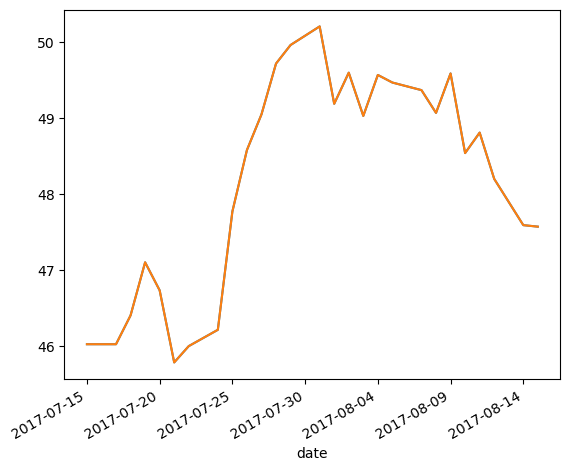

In [16]:
#Check index to apply the formula
na_index_oil = oil[oil['dcoilwtico'].isnull() == True].index.values

#Define the index to use to apply the formala
na_index_oil_plus = na_index_oil.copy()
na_index_oil_minus = np.maximum(0, na_index_oil-1)

for i in range(len(na_index_oil)):
    k = 1
    while (na_index_oil[min(i+k,len(na_index_oil)-1)] == na_index_oil[i]+k):
        k += 1
    na_index_oil_plus[i] = min(len(oil)-1, na_index_oil_plus[i] + k )

#Apply the formula
for i in range(len(na_index_oil)):
    if (na_index_oil[i] == 0):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_plus[i], 'dcoilwtico']
    elif (na_index_oil[i] == len(oil)):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_minus[i], 'dcoilwtico']
    else:
        oil.loc[na_index_oil[i], 'dcoilwtico'] = (oil.loc[na_index_oil_plus[i], 'dcoilwtico'] + oil.loc[na_index_oil_minus[i], 'dcoilwtico'])/ 2 
oil.isnull().sum()
#Plot the oil values
oil_plot = oil['dcoilwtico'].copy()
oil_plot.index = oil['date'].copy()

oil_plot.plot()
plt.setp(oil_plot.plot().get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# **Merging dataframes**

In [17]:
Salesdf = Salesdf.drop('id', axis = 1)
Salesdf = Salesdf.merge(stores, left_on='store_nbr', right_on='store_nbr', how='left')
Salesdf = Salesdf.merge(items, left_on='item_nbr', right_on='item_nbr', how='left')
Salesdf = Salesdf.merge(holidays, left_on='date', right_on='date', how='left')
Salesdf = Salesdf.merge(oil, left_on='date', right_on='date', how='left')
Salesdf = Salesdf.drop(['description', 'state', 'locale_name', 'class'], axis = 1)


In [18]:
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359566 entries, 0 to 3359565
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   item_nbr     int64  
 3   unit_sales   float64
 4   onpromotion  bool   
 5   city         object 
 6   type_x       object 
 7   cluster      int64  
 8   family       object 
 9   perishable   int64  
 10  type_y       object 
 11  locale       object 
 12  transferred  object 
 13  dcoilwtico   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 362.0+ MB


In [19]:
Salesdf.isnull().sum().sort_values(ascending=False)

type_y         2626056
locale         2626056
transferred    2626056
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion          0
city                 0
type_x               0
cluster              0
family               0
perishable           0
dcoilwtico           0
dtype: int64

In [20]:
#Shape
print('Shape : ', Salesdf.shape, '\n')

#Type
print('Type : ', '\n', Salesdf.dtypes)

#Summary
Salesdf.describe()

Shape :  (3359566, 14) 

Type :  
 date            object
store_nbr        int64
item_nbr         int64
unit_sales     float64
onpromotion       bool
city            object
type_x          object
cluster          int64
family          object
perishable       int64
type_y          object
locale          object
transferred     object
dcoilwtico     float64
dtype: object


,store_nbr,item_nbr,unit_sales,cluster,perishable,dcoilwtico
count,3.359566e+06,3.359566e+06,3.359566e+06,3.359566e+06,3.359566e+06,3.359566e+06
mean,2.831059e+01,1.171591e+06,8.053185e+00,8.703191e+00,2.580432e-01,4.814635e+01
std,1.630974e+01,5.871905e+05,2.371664e+01,4.566465e+00,4.375579e-01,1.468388e+00
min,1.000000e+00,9.699500e+04,-2.410000e+02,1.000000e+00,0.000000e+00,4.578000e+01
25%,1.300000e+01,6.925310e+05,2.000000e+00,5.000000e+00,0.000000e+00,4.640000e+01
50%,2.900000e+01,1.212452e+06,4.000000e+00,9.000000e+00,0.000000e+00,4.858000e+01
75%,4.400000e+01,1.583407e+06,8.000000e+00,1.300000e+01,1.000000e+00,4.947000e+01
max,5.400000e+01,2.127114e+06,5.901000e+03,1.700000e+01,1.000000e+00,5.021000e+01


In [21]:
Salesdf.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
2315536,2017-08-05,51,1346637,1.00,False,Guayaquil,A,17,CLEANING,0,Holiday,Local,False,49.470
3166907,2017-08-14,6,2010192,8.00,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,47.590
2732080,2017-08-09,51,464263,14.00,False,Guayaquil,A,17,GROCERY I,0,NaN,NaN,NaN,49.590
2785350,2017-08-10,27,514729,1.00,False,Daule,D,1,GROCERY I,0,Holiday,National,True,48.540
829831,2017-07-22,49,1328495,2.00,False,Quito,A,11,BEVERAGES,0,NaN,NaN,NaN,45.995
61261,2017-07-15,32,1689854,3.00,True,Guayaquil,C,3,PRODUCE,1,NaN,NaN,NaN,46.020
1904696,2017-08-02,3,1948372,4.00,False,Quito,D,8,"LIQUOR,WINE,BEER",0,NaN,NaN,NaN,49.600
794198,2017-07-22,33,1695931,3.58,False,Quevedo,C,3,PRODUCE,1,NaN,NaN,NaN,45.995
720175,2017-07-21,49,900196,3.00,False,Quito,A,11,DAIRY,1,NaN,NaN,NaN,45.780
1765665,2017-07-31,45,1018617,13.00,False,Quito,A,11,GROCERY I,0,NaN,NaN,NaN,50.210


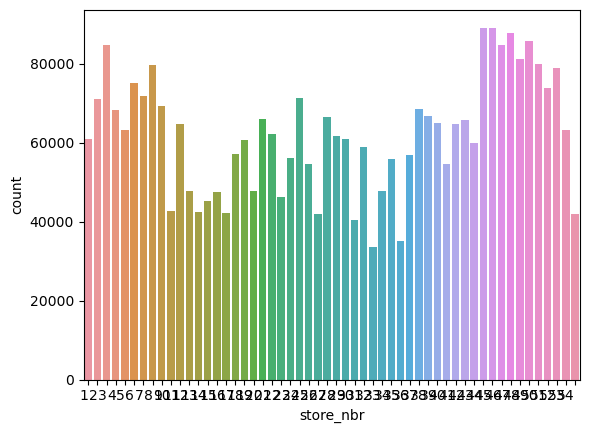

In [22]:
#sns.countplot(x='store_nbr', data=Salesdf)
plt.setp(sns.countplot(x='store_nbr', data=Salesdf).get_xticklabels(), horizontalalignment='right')
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["xtick.labelsize"] = 10
plt.show()

In [23]:
Salesdf.item_nbr.unique

<bound method Series.unique of 0            99197
1           103520
2           105574
3           105575
4           105737
            ...   
3359561    2089339
3359562    2106464
3359563    2110456
3359564    2113914
3359565    2116416
Name: item_nbr, Length: 3359566, dtype: int64>

In [24]:
x=itemfreq(Salesdf.item_nbr)
x=x[x[:,1].argsort()[::-1]]
x

array([[2042947,    1726],
       [ 502331,    1724],
       [ 314384,    1723],
       ...,
       [1981370,       1],
       [1418842,       1],
       [1066900,       1]])

In [25]:
x[:,0][0:10]

array([2042947,  502331,  314384,  323013,  364606,  222879, 2042941,
        414750, 1162382, 1418845])

In [26]:
s=Salesdf.item_nbr.to_numpy()
s

array([  99197,  103520,  105574, ..., 2110456, 2113914, 2116416])

In [27]:
t=s.reshape(s.shape[0],1)
t

array([[  99197],
       [ 103520],
       [ 105574],
       ...,
       [2110456],
       [2113914],
       [2116416]])

In [28]:
t1=np.where(t==x)
t1

(array([], dtype=int64),)

### **Fetching the 10 most purchased products**

In [29]:
#Fetching the 10 most purchased products#
def N_most_labels(data, variable , N , all='TRUE'):
    labels_freq_pd = itemfreq(data[variable])
    labels_freq_pd = labels_freq_pd[labels_freq_pd[:, 1].argsort()[::-1]] #[::-1] ==> to sort in descending order
    
    if all == 'FALSE':
        main_labels = labels_freq_pd[:,0][0:N]
    else: 
        main_labels = labels_freq_pd[:,0][:]
        
    labels_raw_np = data[variable].to_numpy() #transform in numpy
    labels_raw_np = labels_raw_np.reshape(labels_raw_np.shape[0],1)

    labels_filtered_index = np.where(labels_raw_np == main_labels)
    
    return labels_freq_pd, labels_filtered_index

label_freq, labels_filtered_index = N_most_labels(data = Salesdf, variable = "item_nbr", N = 20, all='FALSE')
print("labels_filtered_index[0].shape = ", labels_filtered_index[0].shape)
Salesdf.columns.duplicated()
Salesdf.loc[:,~Salesdf.columns.duplicated()]
Salesdf.columns.duplicated()

Salesdf_filtered = Salesdf.loc[labels_filtered_index[0],:]

labels_filtered_index[0].shape =  (34207,)


In [30]:
label_freq[0:10]

array([[2042947,    1726],
       [ 502331,    1724],
       [ 314384,    1723],
       [ 323013,    1722],
       [ 364606,    1722],
       [ 222879,    1720],
       [2042941,    1719],
       [ 414750,    1716],
       [1162382,    1715],
       [1418845,    1715]])

In [31]:
Salesdf_filtered.sample(3)

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
81464,2017-07-15,43,414750,2.0,False,Esmeraldas,E,10,GROCERY I,0,NaN,NaN,NaN,46.020
1560369,2017-07-29,50,1036689,48.0,False,Ambato,A,14,GROCERY I,0,NaN,NaN,NaN,49.965
188182,2017-07-16,41,222879,16.0,False,Machala,D,4,GROCERY I,0,NaN,NaN,NaN,46.020


In [32]:
Salesdf[~Salesdf.index.duplicated()]

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
0,2017-07-15,1,99197,2.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
1,2017-07-15,1,103520,1.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
2,2017-07-15,1,105574,6.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
3,2017-07-15,1,105575,10.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
4,2017-07-15,1,105737,3.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359561,2017-08-15,54,2089339,4.0,False,El Carmen,C,3,GROCERY I,0,Holiday,Local,False,47.57
3359562,2017-08-15,54,2106464,1.0,True,El Carmen,C,3,BEVERAGES,0,Holiday,Local,False,47.57
3359563,2017-08-15,54,2110456,192.0,False,El Carmen,C,3,BEVERAGES,0,Holiday,Local,False,47.57
3359564,2017-08-15,54,2113914,198.0,True,El Carmen,C,3,CLEANING,0,Holiday,Local,False,47.57


In [33]:
cols=pd.Series(Salesdf.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]

# rename the columns with the cols list.
Salesdf.columns=cols

Salesdf

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
0,2017-07-15,1,99197,2.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
1,2017-07-15,1,103520,1.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
2,2017-07-15,1,105574,6.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
3,2017-07-15,1,105575,10.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
4,2017-07-15,1,105737,3.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359561,2017-08-15,54,2089339,4.0,False,El Carmen,C,3,GROCERY I,0,Holiday,Local,False,47.57
3359562,2017-08-15,54,2106464,1.0,True,El Carmen,C,3,BEVERAGES,0,Holiday,Local,False,47.57
3359563,2017-08-15,54,2110456,192.0,False,El Carmen,C,3,BEVERAGES,0,Holiday,Local,False,47.57
3359564,2017-08-15,54,2113914,198.0,True,El Carmen,C,3,CLEANING,0,Holiday,Local,False,47.57


In [34]:
#Fill in cells if there is no holiday by the value : "no_holyday"


Salesdf_filtered.loc[Salesdf_filtered['locale'].isnull(), 'locale'] = "no_locale"
Salesdf_filtered.loc[Salesdf_filtered['transferred'].isnull(), 'transferred'] = "no_holyday"
Salesdf_filtered.loc[Salesdf_filtered['type_y'].isnull(), 'type_y'] = "no_holyday"


#check is there is NA
Salesdf_filtered.isnull().sum()

date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
city           0
type_x         0
cluster        0
family         0
perishable     0
type_y         0
locale         0
transferred    0
dcoilwtico     0
dtype: int64

In [35]:
def get_month_year(df):
    df['month'] = df.date.apply(lambda x: x.split('-')[1])
    df['year'] = df.date.apply(lambda x: x.split('-')[0])
    
    return df

get_month_year(Salesdf_filtered)

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico,month,year
112,2017-07-15,1,222879,4.0,False,Quito,D,13,GROCERY I,0,no_holyday,no_locale,no_holyday,46.02,07,2017
131,2017-07-15,1,261052,6.0,False,Quito,D,13,GROCERY I,0,no_holyday,no_locale,no_holyday,46.02,07,2017
147,2017-07-15,1,265559,26.0,False,Quito,D,13,GROCERY I,0,no_holyday,no_locale,no_holyday,46.02,07,2017
180,2017-07-15,1,314384,35.0,False,Quito,D,13,GROCERY I,0,no_holyday,no_locale,no_holyday,46.02,07,2017
204,2017-07-15,1,323013,6.0,True,Quito,D,13,GROCERY I,0,no_holyday,no_locale,no_holyday,46.02,07,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359353,2017-08-15,54,1958216,15.0,False,El Carmen,C,3,BEVERAGES,0,Holiday,Local,False,47.57,08,2017
3359445,2017-08-15,54,2010511,22.0,False,El Carmen,C,3,GROCERY I,0,Holiday,Local,False,47.57,08,2017
3359507,2017-08-15,54,2042941,10.0,False,El Carmen,C,3,BEVERAGES,0,Holiday,Local,False,47.57,08,2017
3359508,2017-08-15,54,2042947,14.0,False,El Carmen,C,3,BEVERAGES,0,Holiday,Local,False,47.57,08,2017


In [36]:
Salesdf_filtered['date'] = pd.to_datetime(Salesdf_filtered['date'])
Salesdf_filtered['day'] = Salesdf_filtered['date'].dt.day_name()
Salesdf_filtered = Salesdf_filtered.drop('date', axis=1)

In [37]:
Salesdf_filtered.sample(10)

,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico,month,year,day
2205309,51,1463860,49.0,False,Guayaquil,A,17,BEVERAGES,0,no_holyday,no_locale,no_holyday,49.57,08,2017,Friday
1704178,11,261052,80.0,False,Cayambe,B,6,GROCERY I,0,no_holyday,no_locale,no_holyday,50.21,07,2017,Monday
2255312,22,2042947,25.0,False,Puyo,C,7,BEVERAGES,0,Holiday,Local,False,49.47,08,2017,Saturday
601385,42,414750,21.0,False,Cuenca,D,2,GROCERY I,0,no_holyday,no_locale,no_holyday,46.73,07,2017,Thursday
2221408,5,502331,28.0,False,Santo Domingo,D,4,BREAD/BAKERY,1,Holiday,Local,False,49.47,08,2017,Saturday
173635,33,1036689,6.0,False,Quevedo,C,3,GROCERY I,0,no_holyday,no_locale,no_holyday,46.02,07,2017,Sunday
2419574,49,265559,63.0,False,Quito,A,11,GROCERY I,0,no_holyday,no_locale,no_holyday,49.42,08,2017,Sunday
2372180,26,1052563,12.0,False,Guayaquil,D,10,GROCERY I,0,no_holyday,no_locale,no_holyday,49.42,08,2017,Sunday
2745308,3,1463860,39.0,False,Quito,D,8,BEVERAGES,0,Holiday,National,True,48.54,08,2017,Thursday
2975184,18,581078,67.0,True,Quito,B,16,CLEANING,0,no_holyday,no_locale,no_holyday,48.20,08,2017,Saturday


In [38]:
strain = Salesdf.sample(frac=0.01,replace=True)

# **EDA**

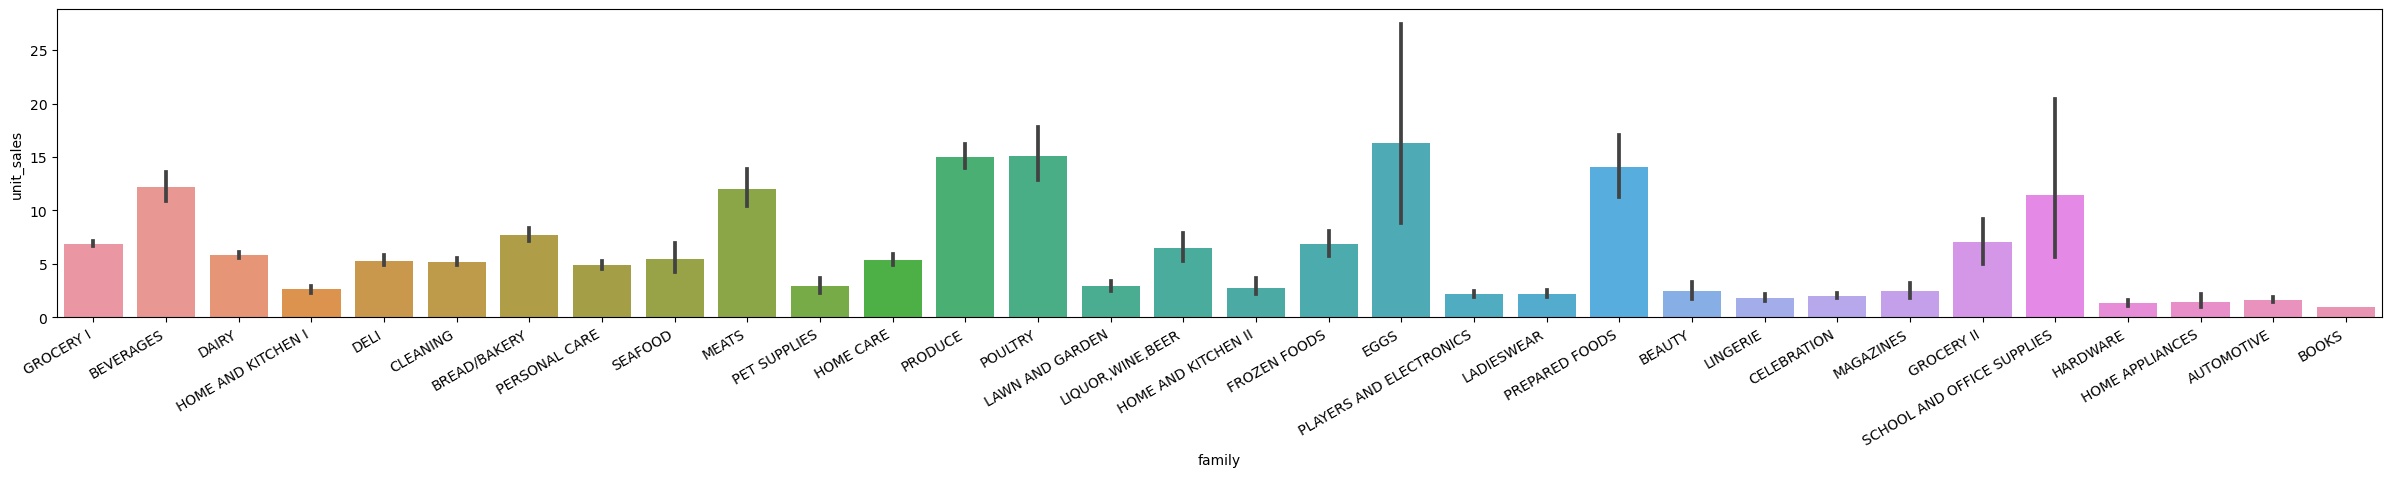

In [39]:
# Plotting Sales per Item Family
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))

plt.setp(sns.barplot(x='family', y='unit_sales', data=strain, ax=axis1).get_xticklabels(),rotation=30, horizontalalignment='right')
plt.show()

<Axes: xlabel='type_x', ylabel='unit_sales'>

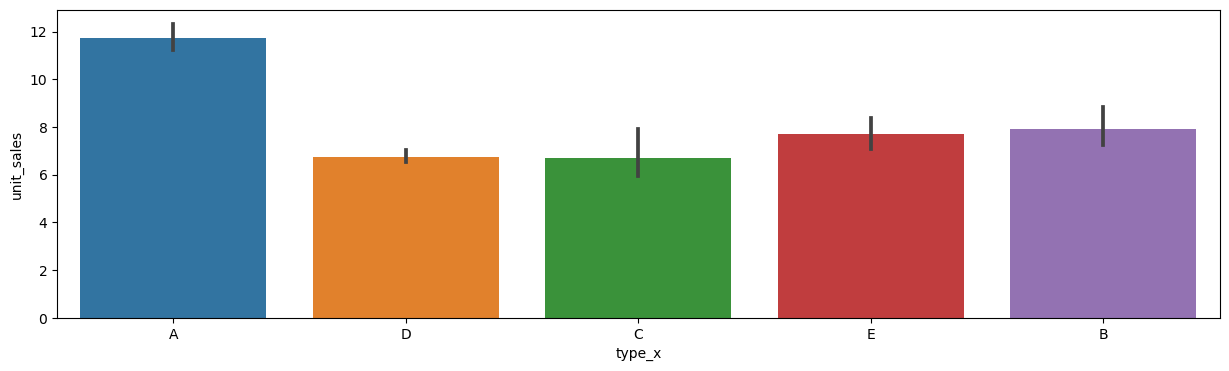

In [40]:
# Plotting Sales per Store Type
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.barplot(x='type_x', y='unit_sales', data=strain, ax=axis1)

<Axes: xlabel='city', ylabel='count'>

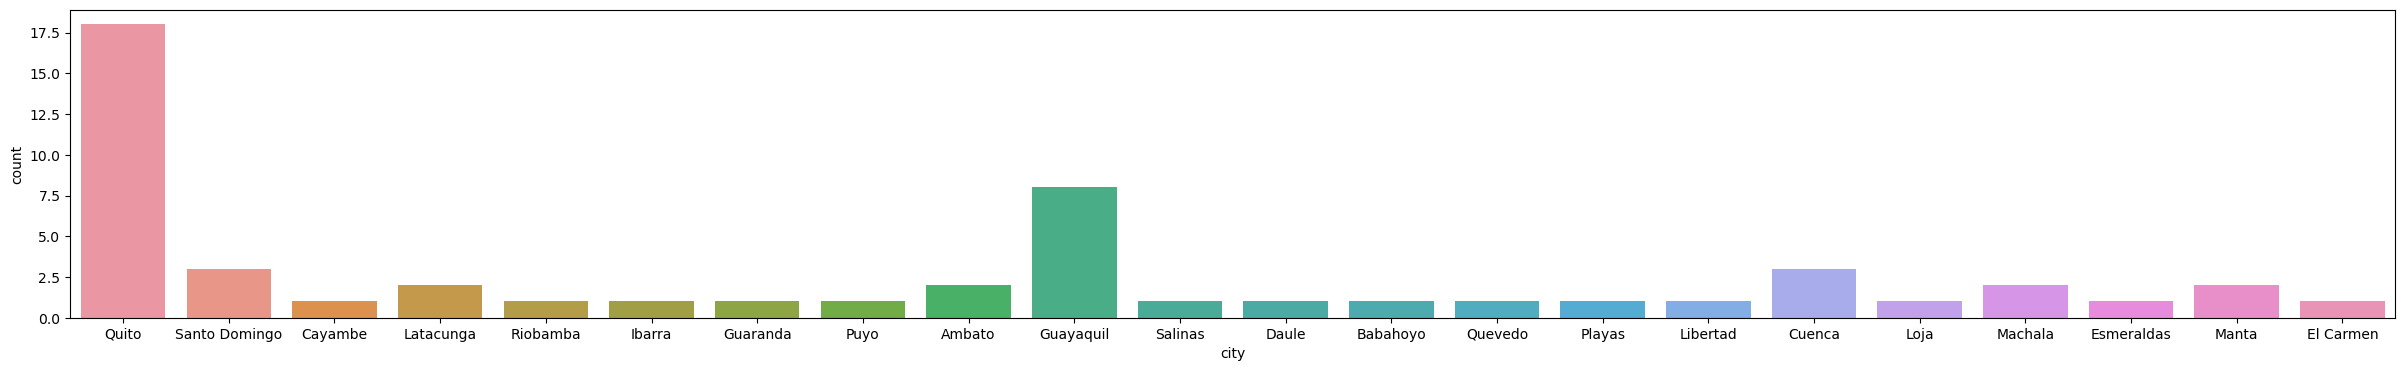

In [41]:
# Plotting Stores in Cities
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x=stores['city'], data=stores, ax=axis1)

<Axes: xlabel='state', ylabel='count'>

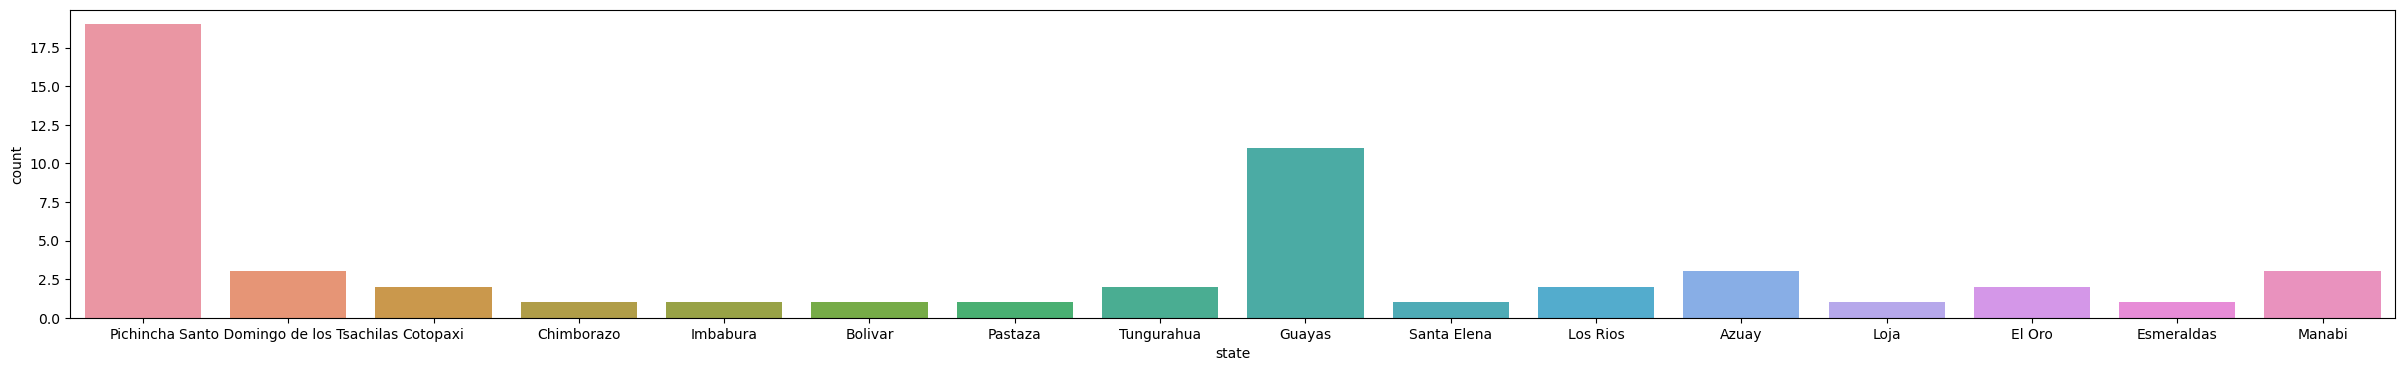

In [42]:
# Plotting Stores in States
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x=stores['state'], data=stores, ax=axis1)

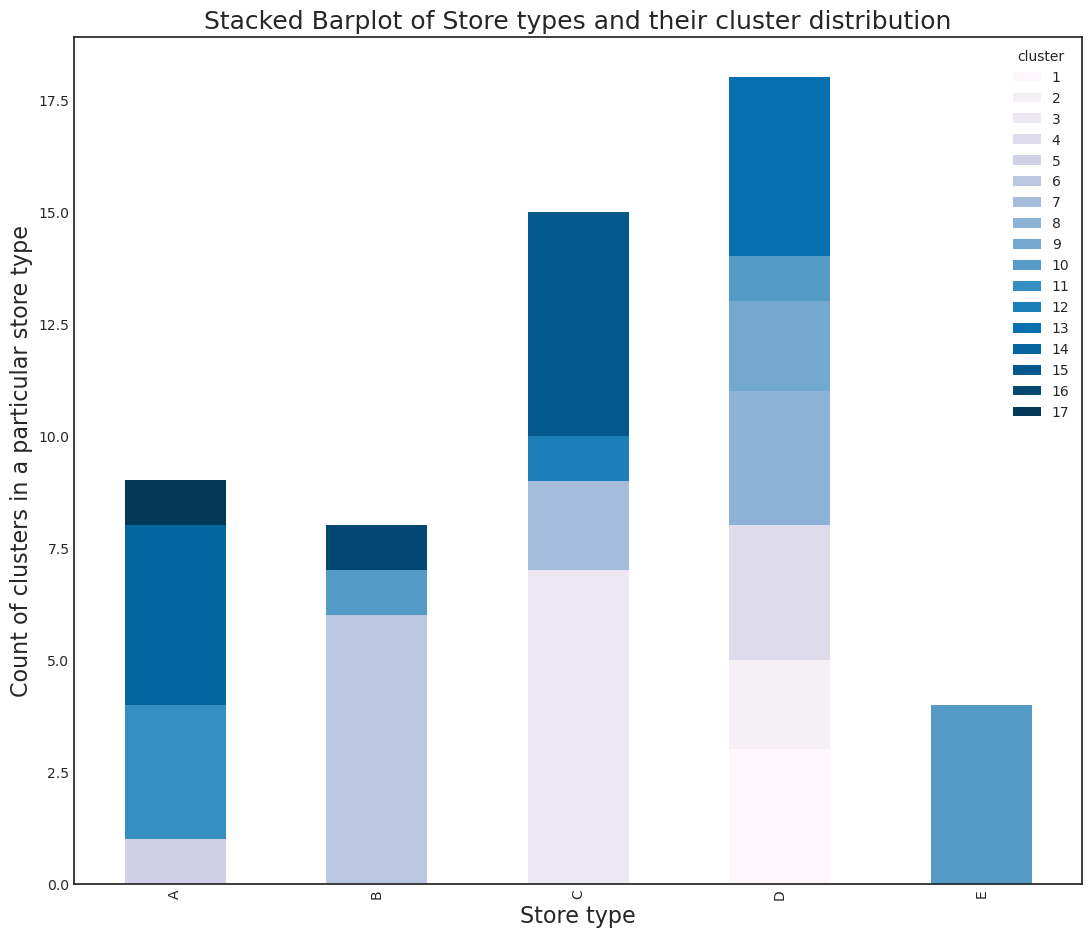

In [43]:
# Stacked Barplots of Types against clusters
plt.style.use('seaborn-white')
#plt.style.use('dark_background')
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)
plt.show()

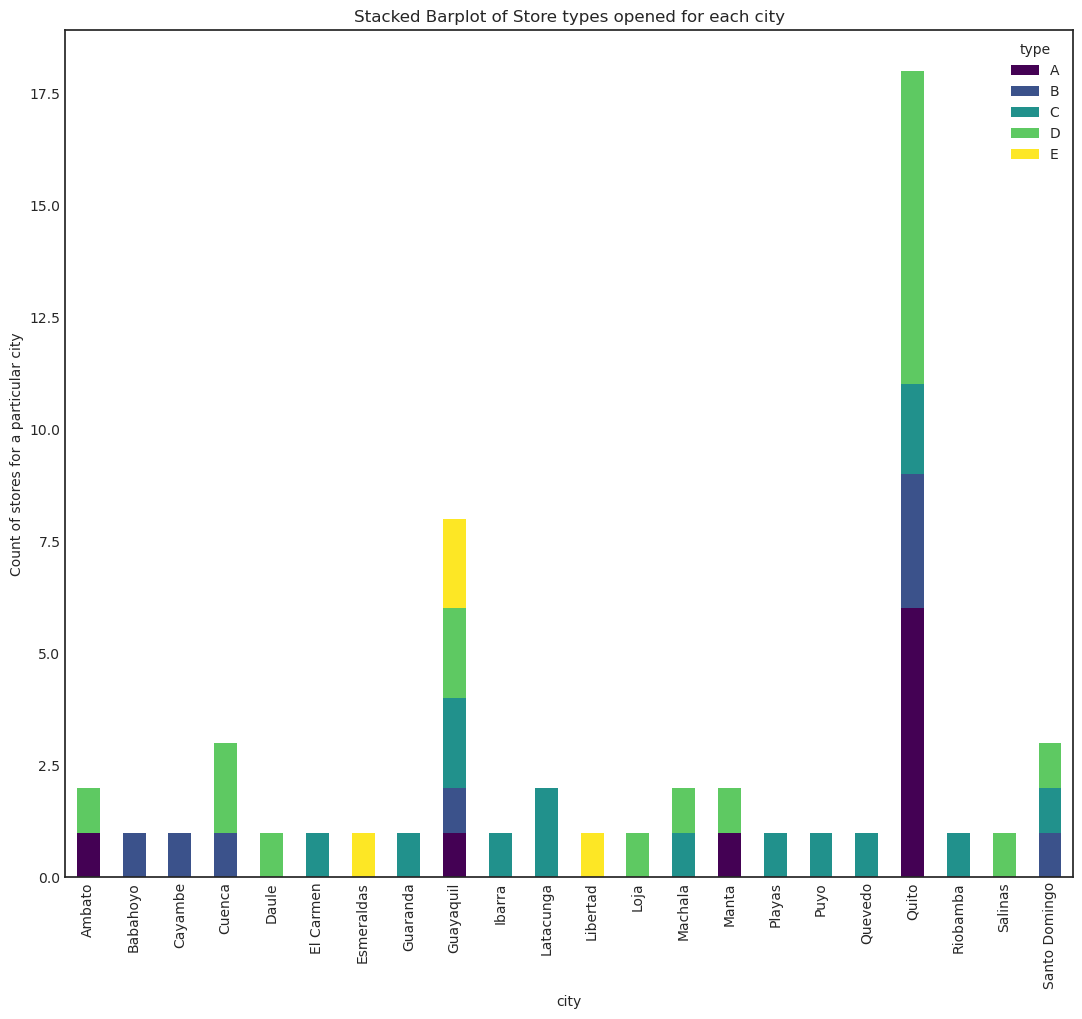

In [44]:
# Stacked barplot of types of stores across the different cities
plt.style.use('seaborn-white')
city_cluster = stores.groupby(['city','type']).store_nbr.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types opened for each city')
plt.ylabel('Count of stores for a particular city')
plt.show()

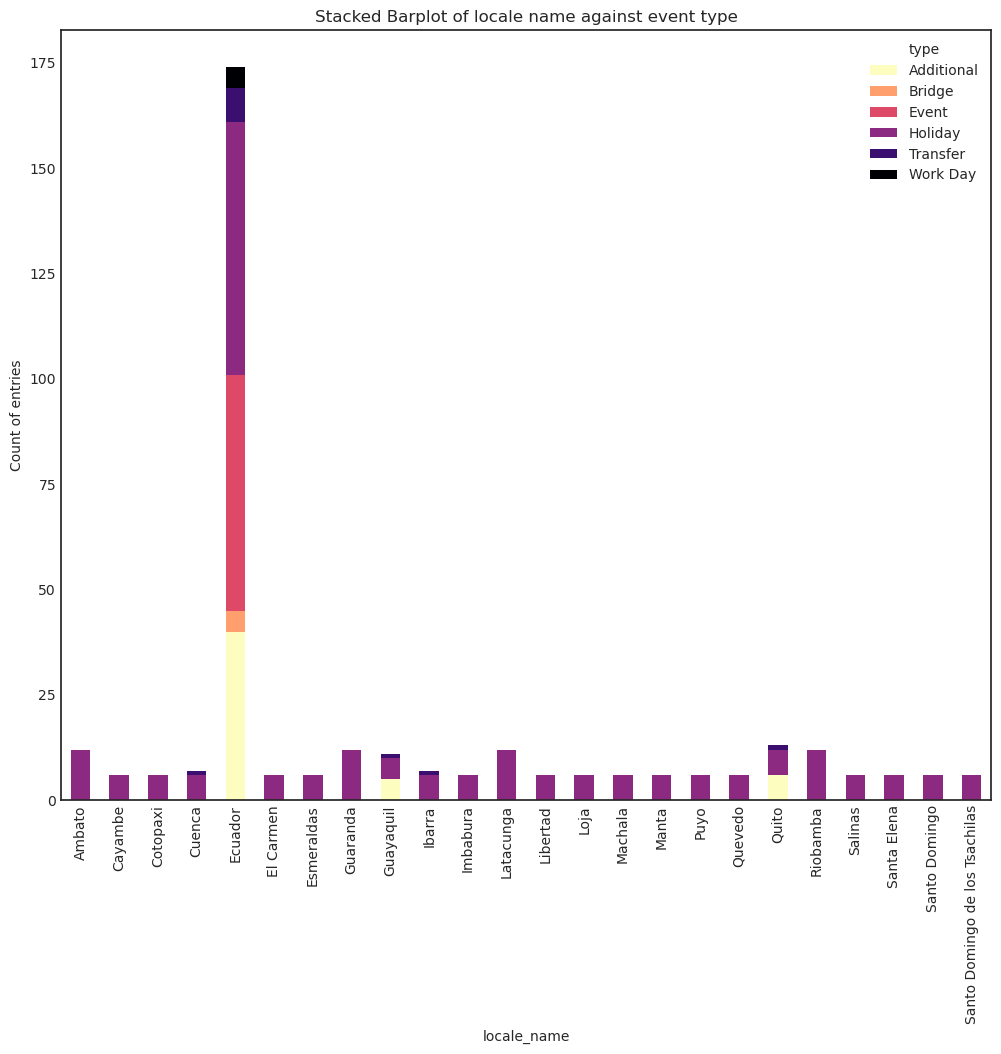

In [45]:
# Holiday Events data
plt.style.use('seaborn-white')
# plt.style.use('dark_background')
holiday_local_type = holidays.groupby(['locale_name', 'type']).size()
holiday_local_type.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.show()

# **Data Transformation Techniques**

### **One hot Encoding**

In [46]:
## One hot encoding using get_dummies on pandas dataframe.
dummy_variables = ['onpromotion','city','type_x','cluster','store_nbr','item_nbr',
                'family','perishable','type_y', 'locale', 'transferred', 'month', 'day']

for var in dummy_variables:
    dummy = pd.get_dummies(Salesdf_filtered[var], prefix = var, drop_first = False)
    Salesdf_filtered = pd.concat([Salesdf_filtered, dummy], axis = 1)

Salesdf_filtered = Salesdf_filtered.drop(dummy_variables, axis = 1)
Salesdf_filtered = Salesdf_filtered.drop(['year'], axis = 1)

In [47]:
Salesdf_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34207 entries, 112 to 3359551
Columns: 148 entries, unit_sales to day_Wednesday
dtypes: float64(2), uint8(146)
memory usage: 5.5 MB


In [48]:
Salesdf_filtered.head()

,unit_sales,dcoilwtico,onpromotion_False,onpromotion_True,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,...,transferred_no_holyday,month_07,month_08,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
112,4.0,46.02,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
131,6.0,46.02,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
147,26.0,46.02,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
180,35.0,46.02,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
204,6.0,46.02,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [49]:
min_train, max_train = Salesdf_filtered['unit_sales'].min(), Salesdf_filtered['unit_sales'].max()
scalable_variables = ['unit_sales','dcoilwtico']

for var in scalable_variables:
    mini, maxi = Salesdf_filtered[var].min(), Salesdf_filtered[var].max()
    Salesdf_filtered.loc[:,var] = (Salesdf_filtered[var] - mini) / (maxi - mini)
print('Shape : ', Salesdf_filtered.shape)
Salesdf_filtered.sample(10)

Shape :  (34207, 148)


,unit_sales,dcoilwtico,onpromotion_False,onpromotion_True,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,...,transferred_no_holyday,month_07,month_08,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
3220917,0.008368,0.408578,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
2564411,0.015167,0.742664,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3269536,0.040795,0.404063,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
408764,0.015167,0.139955,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2174766,0.053870,0.855530,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3269780,0.010983,0.404063,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1267762,0.015167,0.738149,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2226930,0.004184,0.832957,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
608414,0.025105,0.214447,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1545571,0.069038,0.944695,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [50]:
Salesdf_filtered.isnull().sum()

unit_sales           0
dcoilwtico           0
onpromotion_False    0
onpromotion_True     0
city_Ambato          0
                    ..
day_Saturday         0
day_Sunday           0
day_Thursday         0
day_Tuesday          0
day_Wednesday        0
Length: 148, dtype: int64

In [51]:
#train database without unit_sales
Salesdf_filtered = Salesdf_filtered.reset_index(drop=True)  #we reset the index
y = Salesdf_filtered['unit_sales']
X = Salesdf_filtered.drop(['unit_sales'], axis = 1)

print('Shape X :', X.shape)
print('Shape y :', y.shape)

Shape X : (34207, 147)
Shape y : (34207,)


In [52]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (27365, 147)
y_train shape : (27365,)
X_test shape : (6842, 147)
y_test shape : (6842,)


In [53]:
y_train.sample(10)

24791    0.005230
21685    0.030335
5384     0.006276
28520    0.012552
28819    0.008891
22858    0.015167
782      0.051255
4891     0.010460
15004    0.010983
18742    0.027197
Name: unit_sales, dtype: float64

# **Linear Regression**

In [54]:
cols=pd.Series(X_train.columns)

print(cols)
for i in cols:
  if X_train[i].dtypes=="object":
    X_train = X_train.drop(i,1)

model = linear_model.LinearRegression()

results = model.fit(X_train, y_train)
print(results)
  


0             dcoilwtico
1      onpromotion_False
2       onpromotion_True
3            city_Ambato
4          city_Babahoyo
             ...        
142         day_Saturday
143           day_Sunday
144         day_Thursday
145          day_Tuesday
146        day_Wednesday
Length: 147, dtype: object
LinearRegression()


In [55]:
print (results.intercept_, results.coef_)

-449165819384.091 [ 7.13726102e-03  2.29750639e+11  2.29750639e+11 -6.10654947e+10
  9.12671722e+10 -9.07088766e+10 -4.48658793e+10  6.39006616e+10
 -4.45909554e+09 -1.00644586e+11 -6.61663716e+10  6.94549952e+08
 -4.69006268e+10 -4.36118370e+10  1.04803538e+10  8.67752935e+10
  4.49716936e+10 -1.57726417e+11 -1.09414868e+11  2.23748173e+10
 -8.65906496e+10 -1.56780464e+11 -1.40807038e+10 -4.68010150e+10
 -7.02464989e+10  2.03246590e+11  1.97834646e+11  1.50429438e+11
  2.10593526e+11  2.05136821e+11 -2.23190642e+11 -2.22605034e+11
 -7.71822050e+10 -2.28442476e+11 -1.95447289e+10 -7.18851923e+10
 -6.06578234e+10 -1.32874254e+10  9.96333040e+09 -1.67716112e+11
 -4.40247899e+10 -3.84827836e+09  1.19740406e+09 -1.54505914e+10
 -5.45391749e+10  2.80331681e+10 -5.40668741e+10 -2.15084032e+10
 -2.15084032e+10 -7.02357375e+09 -3.02743295e+10  1.21597512e+11
 -2.15084032e+10 -7.02357375e+09 -7.02357375e+09  6.43330734e+10
  9.43922642e+10 -1.73851379e+09 -1.87763626e+10 -1.87763626e+10
 -4.218

In [56]:
import statsmodels.api as sm
#import statsmodels.formula.api as sm

results = sm.OLS(y_train, X_train).fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unit_sales   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     184.9
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:26:15   Log-Likelihood:                 65919.
No. Observations:               27365   AIC:                        -1.317e+05
Df Residuals:                   27279   BIC:                        -1.310e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
dcoilwtico                 0.0071      0.000     15.162      0.000       0.006       0.008
onpromotion_False         -0.0035      0.000    -15.174      0.000      -0.004      -0.003
onpromotion_True           0.0104      0.000     35.778      0.000       0.010       0.011
city_Ambato               -0.0006      0.000     -1.443      0.149      -0.001       0.000
city_Babahoyo              0.0011      0.000      3.107      0.002       0.000       0.002
city_Cayambe               0.0024      0.000      5.286      0.000       0.002       0.003
city_Cuenca                0.0013      0.000      3.340      0.001       0.001       0.002
city_Daule                 0.0009      0.000      2.143      0.032    8.01e-05       0.002
city_El Carmen             0.0017      0.000      3.584      0.000       0.001       0.003
city_Esmeraldas            0.0003      0.000      0.728      0.467      -0.001       0.001
city_Guaranda              0.0015      0.000      3.531      0.000       0.001       0.002
city_Guayaquil            -0.0032      0.000     -9.759      0.000      -0.004      -0.003
city_Ibarra               -0.0002      0.000     -0.366      0.714      -0.001       0.001
city_Latacunga             0.0013      0.000      2.970      0.003       0.000       0.002
city_Libertad             -0.0019      0.000     -4.277      0.000      -0.003      -0.001
city_Loja                  0.0017      0.000      4.037      0.000       0.001       0.003
city_Machala               0.0042      0.000      9.692      0.000       0.003       0.005
city_Manta                -0.0016      0.000     -3.789      0.000      -0.002      -0.001
city_Playas               -0.0026      0.000     -5.478      0.000      -0.003      -0.002
city_Puyo                 -0.0004      0.000     -1.016      0.310      -0.001       0.000
city_Quevedo               0.0001      0.000      0.276      0.783      -0.001       0.001
city_Quito                 0.0045      0.000     16.646      0.000       0.004       0.005
city_Riobamba              0.0001      0.000      0.341      0.733      -0.001       0.001
city_Salinas              -0.0035      0.000     -7.936      0.000      -0.004      -0.003
city_Santo Domingo        -0.0004      0.000     -1.021      0.307      -0.001       0.000
type_x_A                   0.0117      0.000     49.826      0.000       0.011       0.012
type_x_B                  -0.0014      0.000     -5.849      0.000      -0.002      -0.001
type_x_C                  -0.0039      0.000    -19.342      0.000      -0.004      -0.004
type_x_D                  -0.0010      0.000     -4.565      0.000      -0.001      -0.001
type_x_E                   0.0016      0.000      4.720      0.000       0.001       0.002
cluster_1                  0.0017      0.000      4.501      0.000       0.001  

In [57]:
indep=['dcoilwtico','perishable','item_nbr','store_nbr','cluster']
X=Salesdf[indep]
from statsmodels.stats.outliers_influence import variance_inflation_factor  
thresh=10 #Setting a threshold of 10 as a sign of serious and sever multi-collinearity
for i in np.arange(0,len(indep)):
    vif=[variance_inflation_factor(X[indep].values,ix)
    for ix in range(X[indep].shape[1])]
    maxloc=vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print( X[indep].columns[maxloc] )
        del indep[maxloc]
    else:
        break
        
    print ('Final variables: ', indep)

vif : [11.477700032260021, 1.3502134941660446, 4.974319913418713, 4.008314266332858, 4.624524419190846]
dcoilwtico
Final variables:  ['perishable', 'item_nbr', 'store_nbr', 'cluster']


In [58]:
X[indep].head(5)

,perishable,item_nbr,store_nbr,cluster
0,0,99197,1,13
1,0,103520,1,13
2,0,105574,1,13
3,0,105575,1,13
4,0,105737,1,13


In [59]:
X=Salesdf[['perishable', 'item_nbr', 'store_nbr', 'cluster','type_y']]
y=Salesdf[["unit_sales"]]

In [60]:
reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X_train,y_train,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
#Using cross validation of score 5

[0.41357676 0.32073615 0.36778541 0.34969388 0.37168061]
0.3646945626215838
0.0303486054247371


In [61]:
cols=pd.Series(X_test.columns)
for i in cols:
  if str(X_test[i].dtypes)=="object":
    X_test = X_test.drop(i,1)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
print(ridge.score(X_test,y_test)*-1)

-0.32289026502579876


In [62]:
X_train.drop(['month_07','month_08'],inplace=True,axis=1)
X_test.drop(['month_07','month_08'],inplace=True,axis=1)

In [63]:
X_train.drop(['dcoilwtico'],inplace=True,axis=1)
X_test.drop(['dcoilwtico'],inplace=True,axis=1)

In [64]:
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=5,max_leaf_nodes=5)
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred)*-1, '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  -0.34151505635144486 / 1.0
MSE score =  0.0006105670432820245 / 0.0


In [65]:
etr = ExtraTreesRegressor()

# Choose some parameter combinations to try

parameters = {'n_estimators': [5,10,100],
              'criterion': ['squared_error'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold

grid_obj = GridSearchCV(etr, parameters,
                        cv=3, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
etr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
etr.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ExtraTreesRegressor(max_depth=15, min_samples_split=5, n_estimators=5)

In [66]:
y_pred = etr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.7553727859378934 / 1.0
MSE score =  0.00022682570989191218 / 0.0


In [67]:
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5, 10, 100],
              'min_samples_leaf': [1,5]
             }


#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomForestRegressor()

In [68]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.8220372253084516 / 1.0
MSE score =  0.0001650124368153763 / 0.0


In [69]:
X_train

,onpromotion_False,onpromotion_True,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,...,transferred_False,transferred_True,transferred_no_holyday,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
28782,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
27065,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4220,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
15887,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8123,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
30411,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2693,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8076,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [70]:
y_train

28782    0.023013
27065    0.010460
4220     0.006799
15887    0.012029
8123     0.008368
           ...   
6229     0.025105
30411    0.006276
2693     0.017782
8076     0.005753
7624     0.006799
Name: unit_sales, Length: 27365, dtype: float64

In [71]:
#gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.3,n_estimators=100,max_depth=5,min_samples_split=3)
gbr=GradientBoostingRegressor()

parameters = {'n_estimators': [5,10],
              'loss':['huber'],
              'criterion': ['squared_error'],
              'max_depth': [5,10], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GradientBoostingRegressor(criterion='squared_error', loss='huber', max_depth=10,
                          min_samples_split=5, n_estimators=10)

In [72]:
y_pred = gbr.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using Gradient Boosting=  0.44791920073311653 / 1.0
MSE score using Gradient Boosting=  0.0005119059205719131 / 0.0


In [73]:
cols=pd.Series(X_train.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
cols=pd.Series(X_test.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]
model=XGBRegressor(max_depth=5)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print('R2 score using XG Boost= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using XG Boost= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using XG Boost=  0.8319922148931665 / 1.0
MSE score using XG Boost=  0.00015578187108221837 / 0.0


In [74]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(max_depth=5)
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)
print('R2 score using LGBM = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using LGBM = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using LGBM =  0.7591386818699022 / 1.0
MSE score using LGBM =  0.00022333385792674173 / 0.0


In [75]:
X_test.columns.tolist()

['onpromotion_False',
 'onpromotion_True',
 'city_Ambato',
 'city_Babahoyo',
 'city_Cayambe',
 'city_Cuenca',
 'city_Daule',
 'city_El Carmen',
 'city_Esmeraldas',
 'city_Guaranda',
 'city_Guayaquil',
 'city_Ibarra',
 'city_Latacunga',
 'city_Libertad',
 'city_Loja',
 'city_Machala',
 'city_Manta',
 'city_Playas',
 'city_Puyo',
 'city_Quevedo',
 'city_Quito',
 'city_Riobamba',
 'city_Salinas',
 'city_Santo Domingo',
 'type_x_A',
 'type_x_B',
 'type_x_C',
 'type_x_D',
 'type_x_E',
 'cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_6',
 'cluster_7',
 'cluster_8',
 'cluster_9',
 'cluster_10',
 'cluster_11',
 'cluster_12',
 'cluster_13',
 'cluster_14',
 'cluster_15',
 'cluster_16',
 'cluster_17',
 'store_nbr_1',
 'store_nbr_2',
 'store_nbr_3',
 'store_nbr_4',
 'store_nbr_5',
 'store_nbr_6',
 'store_nbr_7',
 'store_nbr_8',
 'store_nbr_9',
 'store_nbr_10',
 'store_nbr_11',
 'store_nbr_12',
 'store_nbr_13',
 'store_nbr_14',
 'store_nbr_15',
 'store_nbr_16',
 'stor